In [1]:
import torch
import time
from torch.optim.lr_scheduler import StepLR, MultiStepLR
from pyDOE import lhs
import numpy as np
from numpy import exp
import math
from pylab import *
from sympy import *
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# 新的解函数
def q1(x, t, c=0.5, x0=0, theta=0):
    """ Compute the solution ε(x,t) as defined """
    c0 = 3/2 
    m = 1
    # Compute the prefactor using the corrected formula
    prefactor = m / np.sqrt(2 * (1 - (c / c0)**2))
    # Compute the sech part
    sech_part = 1 / np.cosh(m * (x - c * t - x0) / (2 * (1 - (c / c0)**2)))

    # Compute the phase, correcting the exponent
    i = 1j
    phase_exponent = i * (c / 2) * x - i * ((c**2 / 4) - (m**2 / (4 * (1 - (c / c0)**2)**2))) * t + i * theta

    phase = np.exp(phase_exponent)


    # Compute the solution
    solution = prefactor * sech_part * phase
    return solution

def q2(x, t, c=0.5, x0=0):
    """ Compute the solution n(x,t) as defined """
    c0 = 3/2
    m = 1  # Given that m = 1 in your problem statement
    prefactor = -m**2 / (2 * (1 - (c/c0)**2)**2)
    sech_part = 1 / np.cosh(m * (x - c * t - x0) / (2 * (1 - (c / c0)**2)))
    return prefactor * sech_part**2


def q(x, t):
    return q1(x, t), q2(x, t)

def bound_l(t, c=0.5):
    """ Left boundary condition based on the solitary wave solution """
    x0 = -15  # adjust based on your domain
    return q1(x0, t, c=c), q2(x0, t, c=c)

def bound_r(t, c=0.5):
    """ Right boundary condition based on the solitary wave solution """
    x1 = 15  # adjust based on your domain
    return q1(x1, t, c=c), q2(x1, t, c=c)

D:\anaconda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


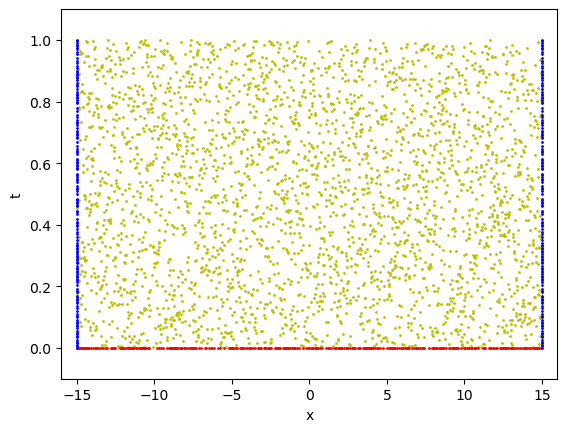

============================== 0 ==============================


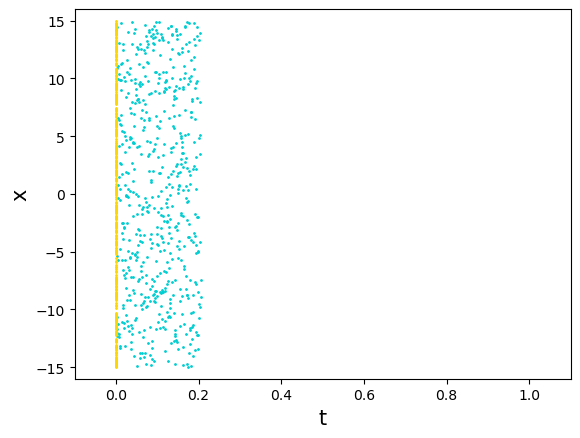

100 epoch, loss: 0.37622055 , f_loss: 0.083257206 , init_loss: 0.13917471 , en_loss: 0.13917471 , mass_loss: 0.0047611934 Time: 1.4852399826049805
200 epoch, loss: 0.045624856 , f_loss: 0.0020361356 , init_loss: 0.021564018 , en_loss: 0.021564018 , mass_loss: 2.0094069e-05 Time: 1.6129932403564453
300 epoch, loss: 0.0031442356 , f_loss: 0.0006418937 , init_loss: 0.0012094018 , en_loss: 0.0012094018 , mass_loss: 6.322505e-06 Time: 1.4892008304595947
400 epoch, loss: 0.0008405609 , f_loss: 0.00045978348 , init_loss: 0.00017435895 , en_loss: 0.00017435895 , mass_loss: 8.863455e-06 Time: 1.474212884902954
500 epoch, loss: 0.00028016674 , f_loss: 0.00018540042 , init_loss: 4.1422027e-05 , en_loss: 4.1422027e-05 , mass_loss: 8.593517e-06 Time: 1.6593191623687744
600 epoch, loss: 0.00014346483 , f_loss: 8.99885e-05 , init_loss: 2.2851182e-05 , en_loss: 2.2851182e-05 , mass_loss: 2.1289777e-06 Time: 1.472259521484375
700 epoch, loss: 8.818616e-05 , f_loss: 5.3238517e-05 , init_loss: 1.5054293e

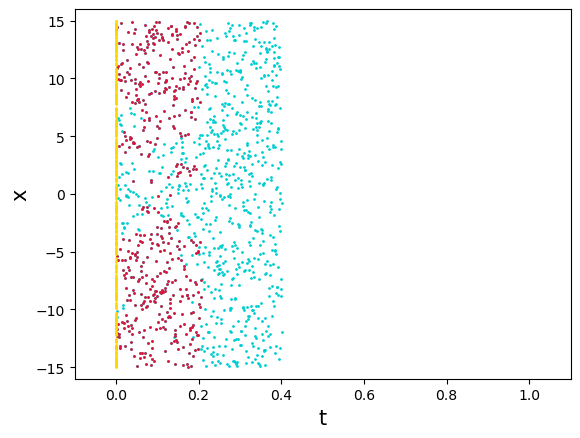

100 epoch, loss: 2.0819687e-05 , f_loss: 1.8756486e-05 , init_loss: 1.2850259e-06 , en_loss: 8.936405e-08 , mass_loss: 2.9567311e-06 Time: 1.6834430694580078
200 epoch, loss: 1.8900611e-05 , f_loss: 1.6862947e-05 , init_loss: 1.2868301e-06 , en_loss: 1.4424168e-07 , mass_loss: 2.911271e-06 Time: 1.95871901512146
300 epoch, loss: 1.738898e-05 , f_loss: 1.552004e-05 , init_loss: 1.1152049e-06 , en_loss: 2.257785e-07 , mass_loss: 2.8620598e-06 Time: 1.836989402770996
400 epoch, loss: 1.6363627e-05 , f_loss: 1.4436415e-05 , init_loss: 1.1663595e-06 , en_loss: 3.0297764e-07 , mass_loss: 2.6776422e-06 Time: 1.737715244293213
500 epoch, loss: 1.5649257e-05 , f_loss: 1.35723685e-05 , init_loss: 1.2821515e-06 , en_loss: 3.537814e-07 , mass_loss: 2.441767e-06 Time: 1.746427297592163
600 epoch, loss: 1.4789014e-05 , f_loss: 1.250695e-05 , init_loss: 1.4293071e-06 , en_loss: 4.813543e-07 , mass_loss: 2.2114903e-06 Time: 1.8862779140472412
700 epoch, loss: 1.450448e-05 , f_loss: 1.216651e-05 , init

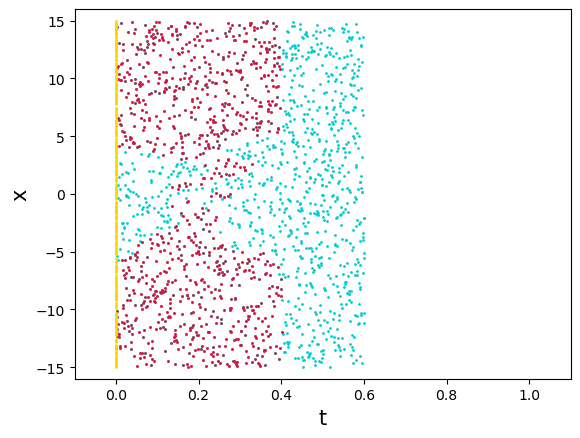

100 epoch, loss: 3.5434157e-05 , f_loss: 3.283455e-05 , init_loss: 1.5149651e-06 , en_loss: 1.1093803e-07 , mass_loss: 5.9385843e-06 Time: 2.090864658355713
200 epoch, loss: 3.4629113e-05 , f_loss: 3.1972944e-05 , init_loss: 1.5507976e-06 , en_loss: 1.5663699e-07 , mass_loss: 5.7618986e-06 Time: 1.864485502243042
300 epoch, loss: 3.4015e-05 , f_loss: 3.129506e-05 , init_loss: 1.585169e-06 , en_loss: 1.9998654e-07 , mass_loss: 5.62185e-06 Time: 1.7162599563598633
400 epoch, loss: 3.3536668e-05 , f_loss: 3.0747113e-05 , init_loss: 1.6154225e-06 , en_loss: 2.3872e-07 , mass_loss: 5.5080473e-06 Time: 2.002639055252075
500 epoch, loss: 3.3151136e-05 , f_loss: 3.0299325e-05 , init_loss: 1.6429026e-06 , en_loss: 2.7369276e-07 , mass_loss: 5.414686e-06 Time: 1.797783374786377
600 epoch, loss: 3.282847e-05 , f_loss: 2.9923074e-05 , init_loss: 1.6664812e-06 , en_loss: 3.040131e-07 , mass_loss: 5.336029e-06 Time: 1.8458685874938965
700 epoch, loss: 3.255799e-05 , f_loss: 2.9603323e-05 , init_loss

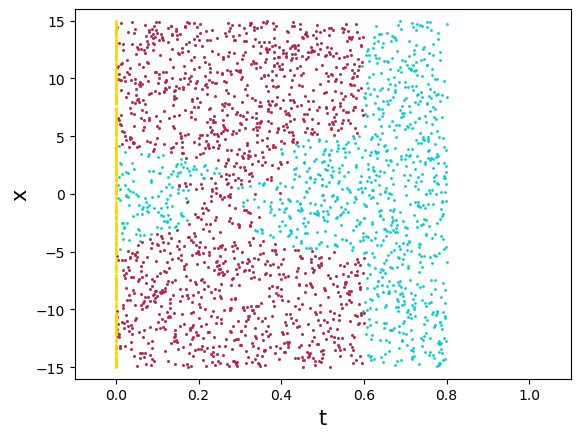

100 epoch, loss: 4.8459235e-05 , f_loss: 4.5027784e-05 , init_loss: 1.7187801e-06 , en_loss: 4.1271596e-07 , mass_loss: 8.0405935e-06 Time: 2.5170812606811523
200 epoch, loss: 4.5187975e-05 , f_loss: 4.103732e-05 , init_loss: 1.8276794e-06 , en_loss: 1.1978559e-06 , mass_loss: 7.33686e-06 Time: 2.5571234226226807
300 epoch, loss: 4.22822e-05 , f_loss: 3.7027192e-05 , init_loss: 2.1671435e-06 , en_loss: 2.1680503e-06 , mass_loss: 6.081783e-06 Time: 2.4213614463806152
400 epoch, loss: 4.0477415e-05 , f_loss: 3.5858466e-05 , init_loss: 1.9059038e-06 , en_loss: 1.9654613e-06 , mass_loss: 5.4330776e-06 Time: 2.6713595390319824
500 epoch, loss: 3.8621027e-05 , f_loss: 3.447149e-05 , init_loss: 1.7837224e-06 , en_loss: 1.7756272e-06 , mass_loss: 4.4465273e-06 Time: 2.4819626808166504
600 epoch, loss: 3.8349124e-05 , f_loss: 3.4048695e-05 , init_loss: 1.9001916e-06 , en_loss: 1.8053456e-06 , mass_loss: 4.246119e-06 Time: 2.4450905323028564
700 epoch, loss: 3.833998e-05 , f_loss: 3.3996384e-05 

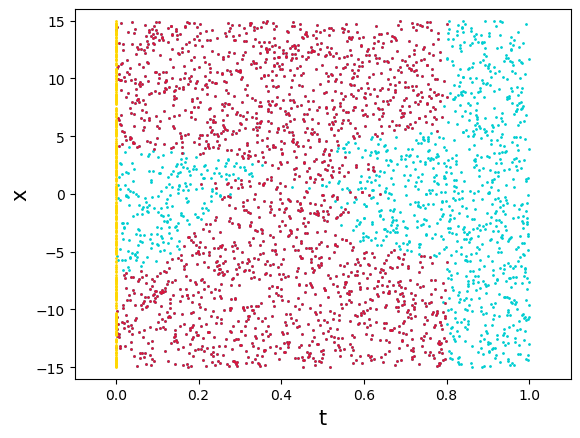

100 epoch, loss: 5.2169646e-05 , f_loss: 4.931943e-05 , init_loss: 1.839876e-06 , en_loss: 2.2172586e-07 , mass_loss: 5.4305483e-06 Time: 3.172628402709961
200 epoch, loss: 4.9877613e-05 , f_loss: 4.6843794e-05 , init_loss: 1.7144041e-06 , en_loss: 6.48472e-07 , mass_loss: 5.4118123e-06 Time: 3.0759546756744385
300 epoch, loss: 4.784681e-05 , f_loss: 4.4115644e-05 , init_loss: 1.8533897e-06 , en_loss: 1.206027e-06 , mass_loss: 5.2655328e-06 Time: 2.987574338912964
400 epoch, loss: 4.510342e-05 , f_loss: 4.063131e-05 , init_loss: 2.1696205e-06 , en_loss: 1.5241303e-06 , mass_loss: 4.9261293e-06 Time: 2.858720302581787
500 epoch, loss: 4.1115243e-05 , f_loss: 3.69722e-05 , init_loss: 2.1935814e-06 , en_loss: 1.3763079e-06 , mass_loss: 4.1616336e-06 Time: 2.8367958068847656
600 epoch, loss: 3.775327e-05 , f_loss: 3.3669443e-05 , init_loss: 2.2164495e-06 , en_loss: 1.384132e-06 , mass_loss: 3.5877936e-06 Time: 2.903136730194092
700 epoch, loss: 3.5368983e-05 , f_loss: 3.100214e-05 , init_l

In [10]:
#每个阶段所有训练点（初始点、边界点、配置点）的精确解
def generate_exact(x0, x1, t0, t1, dx=30/455, dt=1/200):
    x = np.arange(x0, x1 + dx, dx)
    t = np.arange(t0, t1 + dt, dt)
    exact_u = []
    exact_v = []
    exact_n = []

    for x_j in x:
        tmp_u = []
        tmp_v = []
        tmp_n = []

        for t_k in t:
            q_1, q_2 = q(x_j, t_k)
            tmp_u.append(np.real(q_1))  # ε的实部
            tmp_v.append(np.imag(q_1))  # ε的虚部
            tmp_n.append(q_2)           # n的实数部分

        exact_u.append(tmp_u)
        exact_v.append(tmp_v)
        exact_n.append(tmp_n)

    exact_u = np.array(exact_u)
    exact_v = np.array(exact_v)
    exact_n = np.array(exact_n)

    return exact_u, exact_v, exact_n, x, t



def rectangle_area(x0=-15, x1=15, t0=0, t1=1, N_0=300,N_b=300, N_f=3000):
    x = np.arange(x0,x1+30/455,30/455)   #456个点
    t = np.arange(t0,t1+1/200,1/200)    #201个点
   
    lb = np.array([x0, t0])
    ub = np.array([x1, t1])
    X_f = lb + (ub-lb)*lhs(2, N_f)         #配置点集
        
    idx_x = np.random.choice(x.shape[0], N_0, replace=False)
    idx_t = np.random.choice(t.shape[0], int(N_b/2), replace=False)
    
    x_0 =  x[idx_x]                              #初始数据集对应的x
    t_0 =  0*np.ones(N_0)                       #初始数据集对应的t
    t_b = np.concatenate((t[idx_t],t[idx_t]))         #边界数据集对应的t   
    x_b = np.concatenate((x0*np.ones(int(N_b/2)),x1*np.ones(int(N_b/2))))     #边界数据集对应的x              
    x_0.resize( x_0 .shape[0],1)       
    t_0.resize( t_0 .shape[0],1)  
    x_b.resize( x_b .shape[0],1)  
    t_b.resize( t_b .shape[0],1)  
    return x_0, t_0,x_b,t_b,X_f
x0, t0, xb,tb , X_f = rectangle_area()

x_f=X_f[:,0:1]
t_f=X_f[:,1:2]
plt.scatter(X_f[:,0], X_f[:,1], s=1,c='y')
plt.scatter(x0, t0, s=1,c='r')
plt.scatter(xb, tb, s=1,c='b')
plt.axis([-16,16,-0.1,1.1])
plt.xlabel('x')
plt.ylabel('t')
plt.show()

N0=300
Nb=300
Nf=3000
u0_real = []
u0_imag = []
v0 = []

for j in range(N0):
    u, v = q(x0[j], t0[j])  # 使用新的解函数
    u0_real.append(np.real(u))
    u0_imag.append(np.imag(u))
    v0.append(v)  # Assuming n(x, t) is real
u0_real = np.array(u0_real)
u0_imag = np.array(u0_imag)
v0 = np.array(v0)

ub_real = []
ub_imag = []
vb = []
for k in range(Nb):
    u, v = bound_l(tb[k]) if k < Nb/2 else bound_r(tb[k])
    ub_real.append(np.real(u))
    ub_imag.append(np.imag(u))
    vb.append(v)  # Assuming n(x, t) is real
ub_real = np.array(ub_real)
ub_imag = np.array(ub_imag)
vb = np.array(vb)


class PINNs(torch.nn.Module):
    def __init__(self):
        super(PINNs, self).__init__() 
        self.linear1 = torch.nn.Linear(2,30)
        self.linear2 = torch.nn.Linear(30,3)
        #self.linear3 = torch.nn.Linear(30, 30)
        #self.linear4 = torch.nn.Linear(30, 30)
        #self.linear5 = torch.nn.Linear(30, 3)
        self.loss = []
        self.error = []
        
        # 初始化网络参数
        torch.nn.init.constant_(self.linear1.bias, 0.) 
        torch.nn.init.constant_(self.linear2.bias, 0.)
        #torch.nn.init.constant_(self.linear3.bias, 0.)
        #torch.nn.init.constant_(self.linear4.bias, 0.)
        #torch.nn.init.constant_(self.linear5.bias, 0.) 
     
        torch.nn.init.xavier_normal_(self.linear1.weight, gain=1)
        torch.nn.init.xavier_normal_(self.linear2.weight, gain=1)
        #torch.nn.init.xavier_normal_(self.linear3.weight, gain=1)
        #torch.nn.init.xavier_normal_(self.linear4.weight, gain=1)
        #torch.nn.init.xavier_normal_(self.linear5.weight, gain=1)
        
    def forward(self,x,t):
        q = torch.cat([x,t],1)
        y = torch.tanh(self.linear1(q))  
        #y = torch.tanh(self.linear2(y))
        #y = torch.tanh(self.linear3(y))
        #y = torch.tanh(self.linear4(y))
        output = self.linear2(y)
        return output

device = torch.device("cpu")    
model = PINNs().to(device)


def compute_mass(epsilon_real, epsilon_imag, n, x, t):

    # 计算 epsilon 的实部和虚部
    u = epsilon_real
    v = epsilon_imag

    # 计算 |epsilon|^2
    epsilon_mag_squared = u**2 + v**2

    # 确保 epsilon_mag_squared 包含对 x 和 t 的依赖
    epsilon_mag_squared = epsilon_mag_squared * (1 + 0.0 * x + 0.0 * t)

    # 计算时间导数 ∂t (1/2 * |epsilon|^2)
    epsilon_mag_squared_t = gradients(0.5 * epsilon_mag_squared, t)[0]

    # 计算空间导数 u_x, v_x, 以及 (u v_x - u_x v)
    u_x = gradients(u, x)[0]
    v_x = gradients(v, x)[0]

    uvx_minus_uxv = u * v_x - u_x * v

    uvx_minus_uxv_x = gradients(uvx_minus_uxv, x)[0]

    # 计算能量守恒残差
    energy_residual = epsilon_mag_squared_t + uvx_minus_uxv_x

    # 将能量守恒残差的平方作为能量损失项
    mass_loss = torch.mean(energy_residual**2)

    return mass_loss


def gradients(outputs, inputs):
    return torch.autograd.grad(outputs, inputs, grad_outputs=torch.ones_like(outputs), retain_graph=True,create_graph=True)


def train(model, x0, t0, epsilon_real_0, epsilon_imag_0, n_0, xb, tb,epsilon_real_b, epsilon_imag_b, n_b, X_f_all, initial_lr=0.02,iterations=2000, print_every_iter=100,eps=8e-5):
    
    start_time = time.time()
    X_0 = np.append(x0, t0, axis=1)
    dis = np.array([np.min(np.sum((X_0-X_f_all[j])**2,axis=1)) for j in range(Nf)])
    idx = np.argsort(dis,axis=0)
    X_f_all = X_f_all[idx]

    x_0 = torch.tensor(x0, requires_grad = True, dtype=torch.float32).to(device)         
    t_0 = torch.tensor(t0, requires_grad = True, dtype=torch.float32).to(device)
    x_b = torch.tensor(xb, requires_grad = True, dtype=torch.float32).to(device)
    t_b = torch.tensor(tb, requires_grad = True, dtype=torch.float32).to(device)
    epsilon_real_0 = torch.tensor(epsilon_real_0, requires_grad=True, dtype=torch.float32).to(device)
    epsilon_imag_0 = torch.tensor(epsilon_imag_0, requires_grad=True, dtype=torch.float32).to(device)
    n_0 = torch.tensor(n_0, requires_grad=True, dtype=torch.float32).to(device)
    epsilon_real_b = torch.tensor(epsilon_real_b, requires_grad=True, dtype=torch.float32).to(device)
    epsilon_imag_b = torch.tensor(epsilon_imag_b, requires_grad=True, dtype=torch.float32).to(device)
    n_b = torch.tensor(n_b, requires_grad=True, dtype=torch.float32).to(device)
    
    adapt_init = 1.0
    adapt_bc = 1.0
    adapt_en = 1.0
    adapt_energy = 1
    _adapt_init = adapt_init
    _adapt_bc = adapt_bc
    _adapt_en = adapt_en
    _adapt_energy = adapt_energy
    
    parts = 5
    for i in range(parts):
        step_time = time.time()
        optimizer = torch.optim.LBFGS(model.parameters(),lr=initial_lr,max_iter=1000)
        print('='*30,i,'='*30)
        
        en_indexes = []
        X_f = X_f_all[:int(Nf/parts)*(i+1)]
        
        if i == 0:
            _x0 = torch.tensor(x0, requires_grad=True, dtype=torch.float32).to(device)
            _t0 = torch.tensor(t0, requires_grad=True, dtype=torch.float32).to(device)
            _epsilon_real_0 = epsilon_real_0
            _epsilon_imag_0 = epsilon_imag_0
            _n_0 = n_0
        else:
            # 误差估计找最小
            # 新的估计应当考虑新的PDE方程形式
            loss_estimate = (PDE1**2 + PDE2_real**2 + PDE2_imag**2).mean(axis=1)
            for _ in range(int(0.8*Nf/parts)*i):
                idx = torch.argmin(loss_estimate).item()
                en_indexes.append(idx)
                loss_estimate[idx] = 10
            
            _x0 = torch.tensor(X_f[en_indexes,0:1], requires_grad = True, dtype=torch.float32).to(device)
            _t0 = torch.tensor(X_f[en_indexes,1:2], requires_grad = True, dtype=torch.float32).to(device)
            _h = model(_x0, _t0).cpu().detach().numpy()
            _epsilon_real_0 = torch.tensor(_h[:, 0:1], requires_grad=True, dtype=torch.float32).to(device)  # ε的实部
            _epsilon_imag_0  = torch.tensor(_h[:, 1:2], requires_grad=True, dtype=torch.float32).to(device)  # ε的虚部
            _n_0 = torch.tensor(_h[:, 2:3], requires_grad=True, dtype=torch.float32).to(device)  # n

        x_f = torch.tensor(X_f[:,0:1], requires_grad = True, dtype=torch.float32).to(device)
        t_f = torch.tensor(X_f[:,1:2], requires_grad = True, dtype=torch.float32).to(device)
        
        plt.scatter(X_f[:,1:2], X_f[:,0:1], s=1, c='#00CED1')
        plt.scatter(X_f[en_indexes,1:2], X_f[en_indexes,0:1], s=1, c='#DC143C')
        plt.scatter(t0, x0, s=1, c='#FFD700')

        plt.axis([-0.1,1.1,-16,16])
        plt.xlabel('t', fontsize=15)
        plt.ylabel('x', fontsize=15)
        plt.show()

        for k in range(iterations):
        # 计算模型输出
            h0 = model(x_0, t_0)
            epsilon_real_0_pred = h0[:, 0:1]
            epsilon_imag_0_pred = h0[:, 1:2]
            n_0_pred = h0[:, 2:3]

            hb = model(x_b, t_b)
            epsilon_real_b_pred = hb[:, 0:1]
            epsilon_imag_b_pred = hb[:, 1:2]
            n_b_pred = hb[:, 2:3]

            _h0 = model(_x0, _t0)
            epsilon_real_0_init_pred = _h0[:, 0:1]
            epsilon_imag_0_init_pred = _h0[:, 1:2]
            n_0_init_pred = _h0[:, 2:3]

            h = model(x_f, t_f)
            epsilon_real = h[:, 0:1]
            epsilon_imag = h[:, 1:2]
            n = h[:, 2:3]
        

            # 计算梯度
            epsilon_real_t = gradients(epsilon_real, t_f)[0]
            epsilon_imag_t = gradients(epsilon_imag, t_f)[0]
            epsilon_real_x = gradients(epsilon_real, x_f)[0]
            epsilon_imag_x = gradients(epsilon_imag, x_f)[0]
            epsilon_real_xx = gradients(epsilon_real_x, x_f)[0]
            epsilon_imag_xx = gradients(epsilon_imag_x, x_f)[0]

            n_t = gradients(n, t_f)[0]
            n_tt = gradients(n_t, t_f)[0]
            n_x = gradients(n, x_f)[0]
            n_xx = gradients(n_x, x_f)[0]
            
            c0=3/2

           # 构建PDE残差，这里需要您提供具体的PDE形式
            PDE1 = 1 / c0**2 * n_tt - n_xx - 2*(epsilon_real_x**2 + epsilon_imag_x**2 + epsilon_real*epsilon_real_xx + epsilon_imag*epsilon_imag_xx)
            PDE2_real = epsilon_real_xx -epsilon_real * n  - epsilon_imag_t
            PDE2_imag = epsilon_real_t + epsilon_imag_xx - n * epsilon_imag

        # 计算残差的平方和
            loss_pde1 = torch.mean(PDE1**2)
            loss_pde2_real = torch.mean(PDE2_real**2)
            loss_pde2_imag = torch.mean(PDE2_imag**2)
            
        
            init_loss = torch.mean((epsilon_real_0-epsilon_real_0_pred)**2) +torch.mean((epsilon_imag_0-epsilon_imag_0_pred)**2)+ torch.mean((n_0-n_0_pred)**2)
            bc_loss=torch.mean((epsilon_real_b_pred - epsilon_real_b)**2)+torch.mean((epsilon_imag_b_pred - epsilon_imag_b)**2)+torch.mean((n_b_pred - n_b)**2)
            f_loss =torch.mean(PDE1**2)+torch.mean(PDE2_real**2)+torch.mean(PDE2_imag**2)
            en_loss=torch.mean((_epsilon_real_0-epsilon_real_0_init_pred)**2)+torch.mean((_epsilon_imag_0-epsilon_imag_0_init_pred)**2)+torch.mean((_n_0-n_0_init_pred)**2)
            
            
             # 计算能量损失
            mass_loss = compute_mass(epsilon_real, epsilon_imag, n, x_f, t_f)
            

            loss=_adapt_init*init_loss + _adapt_bc*bc_loss + _adapt_en*en_loss + f_loss+_adapt_energy* mass_loss
            
            optimizer.zero_grad()
            
            if loss.cpu().data.numpy() < eps:
                break
            if (k + 1) % print_every_iter == 0:
                elapsed = time.time() - step_time
                step_time = time.time()
                print(k + 1, "epoch, loss:", loss.cpu().data.numpy(), ", f_loss:", f_loss.cpu().data.numpy(), ", init_loss:", init_loss.cpu().data.numpy(), ", en_loss:", en_loss.cpu().data.numpy(), ", mass_loss:", mass_loss.cpu().data.numpy(),'Time:', elapsed)
                model.loss.append(loss.cpu().data.numpy())
             
                grad_res_list = []
                grad_init_list = []
                grad_bc_list = []
                grad_en_list = []
                grad_mass_list = []  # 新增能量损失的梯度列表
                for w in model.parameters():
                    grad_res_list.append(gradients(f_loss, w)[0].abs().mean().cpu().data.numpy())
                    grad_init_list.append(gradients(init_loss, w)[0].abs().mean().cpu().data.numpy())
                    grad_bc_list.append(gradients(bc_loss, w)[0].abs().mean().cpu().data.numpy())
                    grad_en_list.append(gradients(en_loss, w)[0].abs().mean().cpu().data.numpy())
                    grad_mass_list.append(gradients(mass_loss, w)[0].abs().mean().cpu().data.numpy())  # 计算能量损失的梯度

                adapt_init = min(np.array(np.array(grad_init_list).mean() / grad_res_list).max(), 1)
                adapt_bc = min(np.array(grad_bc_list).mean() / np.array(grad_res_list).max(), 2)
                adapt_en = min(np.array(grad_en_list).mean() / np.array(grad_res_list).max(), 1)
                adapt_energy = min(np.array(grad_mass_list).mean() / np.array(grad_res_list).mean(), 2)  # 计算能量损失的自适应权重

                _adapt_init = 0.9*_adapt_init + 0.1*adapt_init
                _adapt_bc = 0.9*_adapt_bc + 0.1*adapt_bc
                _adapt_en = 0.9*_adapt_en + 0.1*adapt_en
                _adapt_energy = 0.9 * _adapt_energy + 0.1 * adapt_energy  # 更新能量损失的自适应权重
                
            def closure():
                return loss
            loss.backward() 
            
            optimizer.step(closure)
            
    return True, time.time()-start_time  
loops_time = []
s1 = time.time()
epsilon_real_0, epsilon_imag_0, n_0 = [], [], []
for x_val, t_val in zip(x0, t0):
    epsilon, n = q(x_val, t_val)
    epsilon_real_0.append(np.real(epsilon))
    epsilon_imag_0.append(np.imag(epsilon))
    n_0.append(n)

epsilon_real_0 = np.array(epsilon_real_0)
epsilon_imag_0 = np.array(epsilon_imag_0)
n_0 = np.array(n_0)

# 计算边界条件下的 ε 和 n
epsilon_real_b, epsilon_imag_b, n_b = [], [], []
for x_val, t_val in zip(xb, tb):
    epsilon, n = q(x_val, t_val)
    epsilon_real_b.append(np.real(epsilon))
    epsilon_imag_b.append(np.imag(epsilon))
    n_b.append(n)

epsilon_real_b = np.array(epsilon_real_b)
epsilon_imag_b = np.array(epsilon_imag_b)
n_b = np.array(n_b)

flag = False
while not flag:
    flag, elapsed = train(model, x0, t0, epsilon_real_0, epsilon_imag_0, n_0, xb, tb, epsilon_real_b, epsilon_imag_b, n_b, X_f, iterations=3000, print_every_iter=100, eps=1e-7)
    loops_time.append(elapsed)
    print(f"Total elapsed time: {sum(loops_time)}, Iteration times: {loops_time}")

e1 = time.time() - s1
print(f"Total training time: {e1} seconds")

Error u: 4.418357e-03
Error v: 1.529099e-02
Error h: 5.342340e-02


NameError: name 'loss_data' is not defined

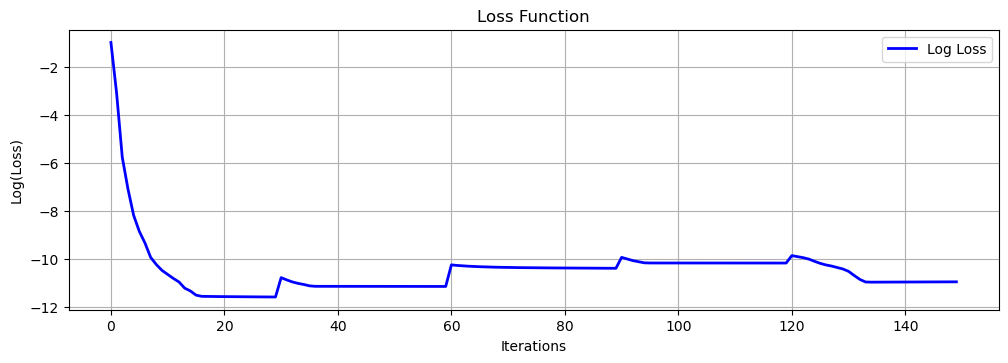

In [11]:
x = np.array(np.arange(-15, 15+30/455, 30/455))
t = np.array(np.arange(0, 1+1/200, 1/200))

x.resize(x.shape[0],1)
t.resize(t.shape[0],1)
X,T = np.meshgrid(x,t)

X_ = X.reshape((456*201,1))
T_ = T.reshape((456*201,1))
# 生成q1和q2的值
q1_values = q1(X_, T_)
q2_values = q2(X_, T_)

# 如果q1是复数，正确处理实部和虚部
Z_1_0_real = np.real(q1_values).reshape(201, 456)
Z_1_0_imag = np.imag(q1_values).reshape(201, 456)
Z_1_0_mag = np.abs(q1_values).reshape(201, 456)  # q1的模

# q2是实数，直接重塑
Z_2_0 = q2_values.reshape(201, 456)

X_ = torch.tensor(X_, requires_grad=True, dtype=torch.float32).to(device)
T_ = torch.tensor(T_, requires_grad=True, dtype=torch.float32).to(device)

# 获取模型输出
output = model(X_, T_).cpu().detach().numpy()

# 解析输出，假设输出格式为 [ε_real, ε_imag, n]
epsilon_real = output[:, 0:1]
epsilon_imag = output[:, 1:2]
n = output[:, 2:3]

# 计算ε的模
epsilon_magnitude = np.sqrt(epsilon_real**2 + epsilon_imag**2)

# 重塑以匹配图形尺寸
Z_1_pred = epsilon_magnitude.reshape(201, 456)
Z_2_pred = n.reshape(201, 456)

exact_eps = []
exact_n = []

for x_j in x:
    tmp_eps = []
    tmp_n = []

    for t_k in t:
        eps, n = q(x_j,t_k)
        tmp_eps.append(eps)
        tmp_n.append(n)        
    exact_eps.append(tmp_eps)
    exact_n.append(tmp_n)  

exact_eps = np.array(exact_eps).T
exact_n = np.array(exact_n).T

Exact_u = np.real(exact_eps)
Exact_v = np.imag(exact_eps)
Exact_n = exact_n
# 首先检查Exact_u, Exact_v, Exact_n的时间步数
X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))
u_star = Exact_u.flatten()[:, None]  # Flatten the array
v_star = Exact_v.flatten()[:, None]  # Flatten the array
n_star = Exact_n.flatten()[:, None]  # Flatten the array

# 总体误差
x_star = torch.tensor(X_star[:,0:1], requires_grad=True, dtype=torch.float32).to(device)
t_star = torch.tensor(X_star[:,1:2], requires_grad=True, dtype=torch.float32).to(device)
output = model(x_star,t_star).cpu().detach().numpy()    #切断x_star和t_star的反向传播

# 假设output前半部分是epsilon的实部和虚部，后半部分是n
epsilon_real_pred = output[:, 0:1]
epsilon_imag_pred = output[:, 1:2]
n_pred = output[:, 2:3]

# 计算实际和预测的 epsilon 的模和 n 的值
epsilon_actual_mag = np.sqrt(Exact_u**2 + Exact_v**2)
epsilon_pred_mag = np.sqrt(epsilon_real_pred**2 + epsilon_imag_pred**2)
# u_star, v_star, h_star 应该是从实际的解析解中计算得到
# 计算误差
error_u = np.linalg.norm(u_star - epsilon_real_pred, 2) / np.linalg.norm(u_star, 2)
error_v = np.linalg.norm(v_star - epsilon_imag_pred, 2) / np.linalg.norm(v_star, 2)
error_h = np.linalg.norm(n_star - n_pred, 2) / np.linalg.norm(n_star, 2)

print('Error u: %e' % (error_u))
print('Error v: %e' % (error_v))
print('Error h: %e' % (error_h))

# 创建一个图形并设置子图布局
plt.figure(figsize=(12, 8))

# 绘制 loss 曲线
plt.subplot(2, 1, 1)
plt.plot(np.log(model.loss), color='blue', linewidth=2, label='Log Loss')
plt.title('Loss Function')
plt.xlabel('Iterations')

plt.ylabel('Log(Loss)')
plt.grid(True)
plt.legend()
# 假设 model.loss 是一个 numpy 数组
mass_loss_data = np.log(model.loss)  # 保存对数形式的数据

# 保存为 .npy 文件
np.save('mass_loss_data.npy', loss_data)
print("Loss data saved as 'mass_loss_data.npy'")

# 绘制 error 曲线
plt.subplot(2, 1, 2)
# 检查 model.error 是否存在

plt.plot(model.error, color='red', linewidth=2, label='Error')
plt.ylim(0, 1)  # 设置 y 轴范围
plt.title('Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

# 显示图表
plt.tight_layout()  # 调整子图间距
plt.show()
# 保存预测的 ε 和 n 数据
np.save('Z_1_pred.npy', Z_1_pred)
np.save('Z_2_pred.npy', Z_2_pred)

# 绘图部分
plt.figure(figsize=(12, 6))

# ε 的预测值密度图
plt.subplot(1, 2, 1)
plt.title('Predicted ε')
plt.contourf(X, T, Z_1_pred, levels=50, cmap='Reds', alpha=0.8)
plt.colorbar(label='Predicted ε')
plt.xlabel('x')
plt.ylabel('t')

# n 的预测值密度图
plt.subplot(1, 2, 2)
plt.title('Predicted n')
plt.contourf(X, T, Z_2_pred, levels=50, cmap='Reds', alpha=0.8)
plt.colorbar(label='Predicted n')
plt.xlabel('x')
plt.ylabel('t')

plt.tight_layout()
plt.show()

In [ ]:
#1
#Error u: 5.495748e-03
#Error v: 1.984411e-02
#Error h: 5.384975e-02

#2
#Error u: 3.848232e-03
#Error v: 3.258576e-02
#Error h: 7.679940e-02

#3
#Error u: 3.542980e-03
#Error v: 1.548484e-02
#Error h: 4.401148e-02

#4
#Error u: 3.372340e-03
#Error v: 1.400466e-02
#Error h: 3.121753e-02

#5
#Error u: 4.249194e-03
#Error v: 1.702564e-02
#Error h: 4.231829e-02

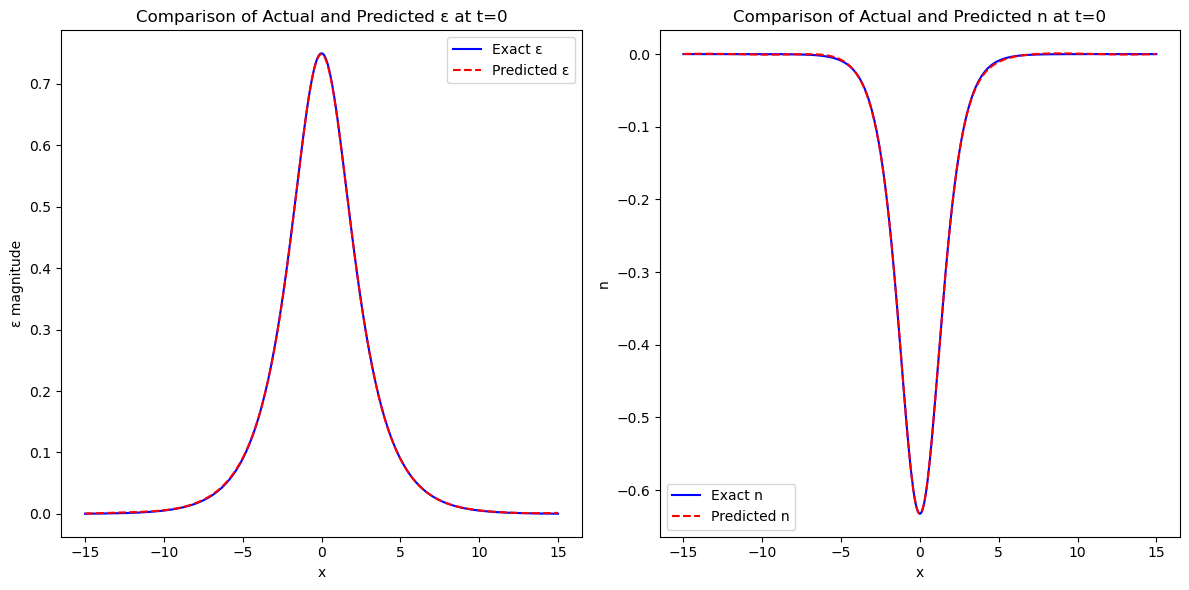

In [12]:
# 假设 Z_1_0_mag, Z_1_pred, Z_2_0, Z_2_pred 是已经计算好的矩阵，每行代表一个时间点，列代表不同的 x 值


# 选择 t=0 时刻的数据（通常是第一行）
epsilon_actual = Z_1_0_mag[0, :]
epsilon_predicted = Z_1_pred[0, :]
n_actual = Z_2_0[0, :]
n_predicted = Z_2_pred[0, :]
# 假设您已有数据 epsilon_predicted 和 epsilon_actual
np.save('1.5_Zak_epsilon_predicted.npy', epsilon_predicted)
np.save('1.5_Zak_epsilon_actual.npy', epsilon_actual)
np.save('1.5_n_predicted.npy',n_predicted )
np.save('1.5_n_actual.npy', n_actual)

# 绘图
plt.figure(figsize=(12, 6))

# 绘制 ε 的比较
plt.subplot(1, 2, 1)
plt.plot(x.flatten(), epsilon_actual, 'b-', label='Exact ε')
plt.plot(x.flatten(), epsilon_predicted, 'r--', label='Predicted ε')
plt.title('Comparison of Actual and Predicted ε at t=0')
plt.xlabel('x')
plt.ylabel('ε magnitude')
plt.legend()

# 绘制 n 的比较
plt.subplot(1, 2, 2)
plt.plot(x.flatten(), n_actual, 'b-', label='Exact n')
plt.plot(x.flatten(), n_predicted, 'r--', label='Predicted n')
plt.title('Comparison of Actual and Predicted n at t=0')
plt.xlabel('x')
plt.ylabel('n')
plt.legend()

plt.tight_layout()
plt.show()

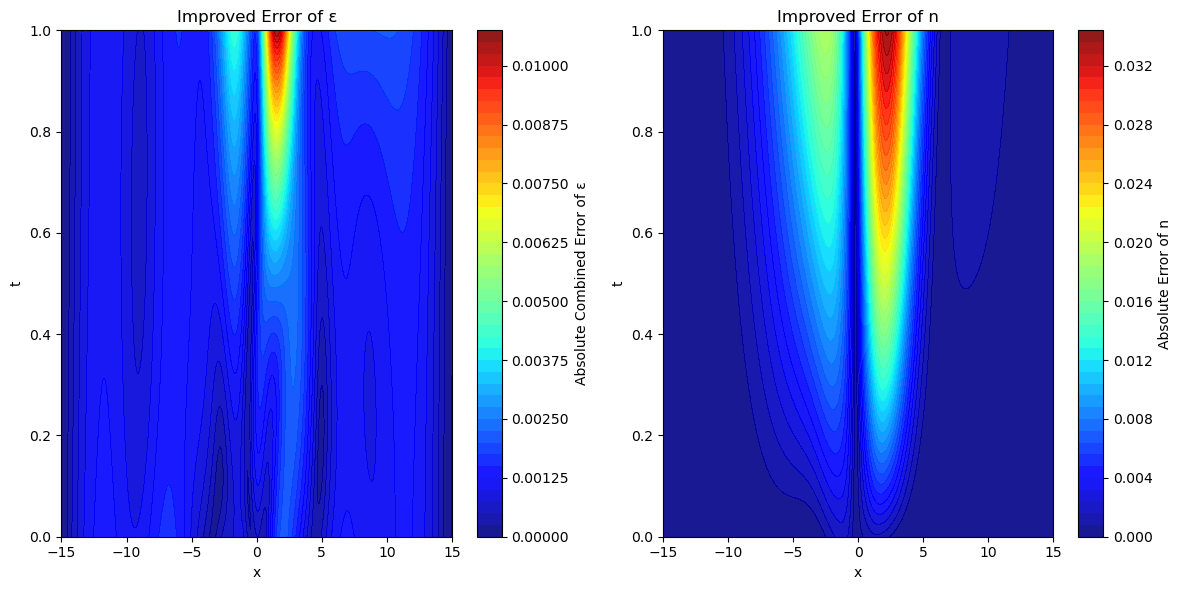

In [6]:
epsilon_real_error = np.abs(u_star - epsilon_real_pred)
epsilon_imag_error = np.abs(v_star - epsilon_imag_pred)
# 计算逐点的 ε 的总误差（结合实部和虚部）
epsilon_error = np.sqrt(epsilon_real_error**2 + epsilon_imag_error**2)

# 假设 n_star 和 n_pred 是 n 的实际值和预测值
n_error = np.abs(n_star - n_pred)

# 将误差数据恢复到网格形状
epsilon_error = epsilon_error.reshape(X.shape)
n_error = n_error.reshape(X.shape)

np.save('n_error.npy', n_error)
np.save('epsilon_error.npy', epsilon_error)

plt.figure(figsize=(12, 6))

 #ε 的总误差密度图
plt.subplot(1, 2, 1)
plt.title('Improved Error of ε')
plt.contourf(X, T, epsilon_error, levels=50, cmap='jet', alpha=0.9)
plt.colorbar(label='Absolute Combined Error of ε')
plt.xlabel('x')
plt.ylabel('t')

# n 的原始误差密度图
plt.subplot(1, 2, 2)
plt.title('Improved Error of n')
plt.contourf(X, T, n_error, levels=50, cmap='jet', alpha=0.9)
plt.colorbar(label='Absolute Error of n')
plt.xlabel('x')
plt.ylabel('t')

plt.tight_layout()
plt.show()